## Import Libraries

In [35]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline


## Load the Data

In [36]:
df = pd.read_csv(r"C:\Users\labbo\OneDrive\Desktop\BootTuwaiq\week3\Usecase-7\cleaned_data_football.csv")

In [37]:
df.shape # to see row and column

(10754, 19)

In [38]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


In [39]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True) #to drop cloumn Unnamed: 0 

In [40]:
df.head(2) # see it aagain 

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [41]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [42]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [43]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [44]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['highest_value', 'current_value', 'games_injured','days_injured','minutes played','clean sheets','goals conceded','red cards','second yellow cards','yellow cards','assists','goals','appearance','age','height']

In [45]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [46]:
categorical_features = ['team', 'position']
numeric_features = ['highest_value', 'current_value', 'games_injured',
'days_injured','minutes played','clean sheets','goals conceded',
'red cards','second yellow cards','yellow cards','assists','goals','appearance','age','height']

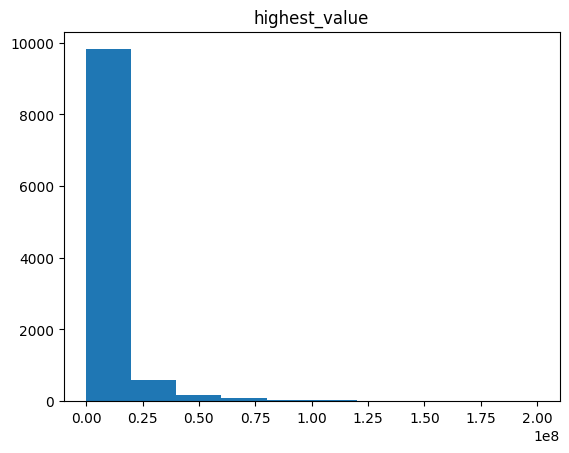

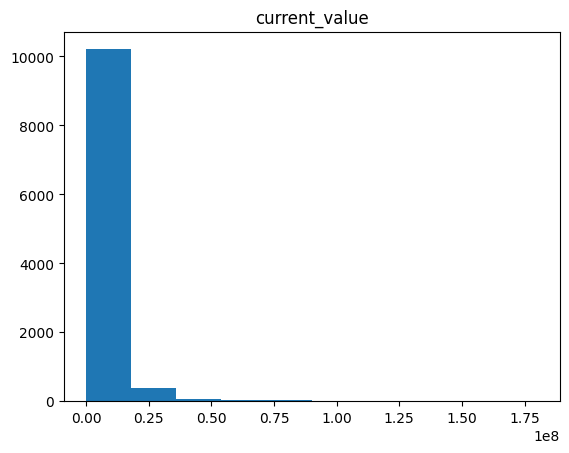

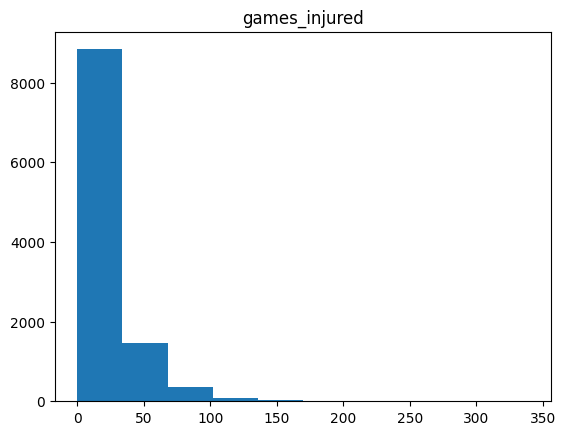

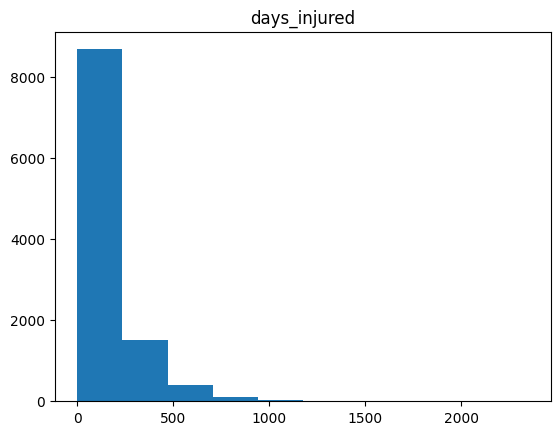

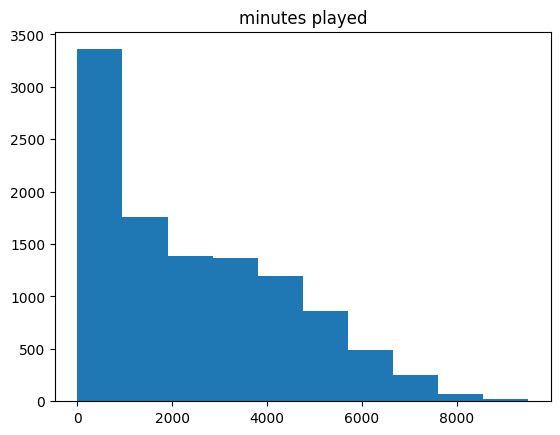

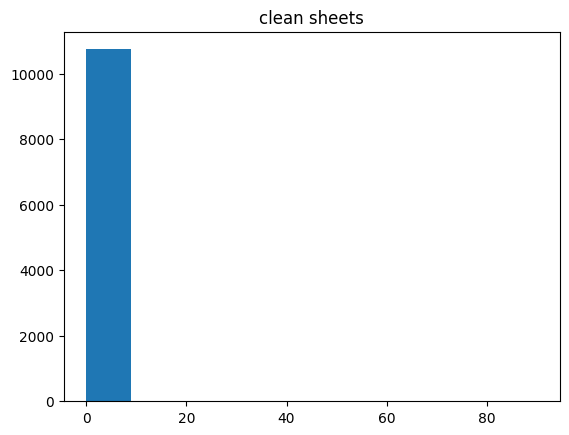

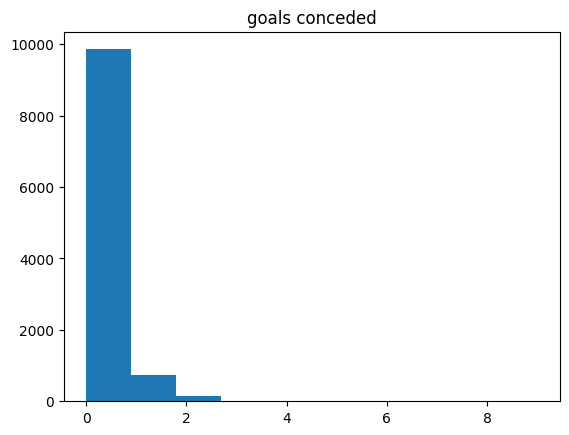

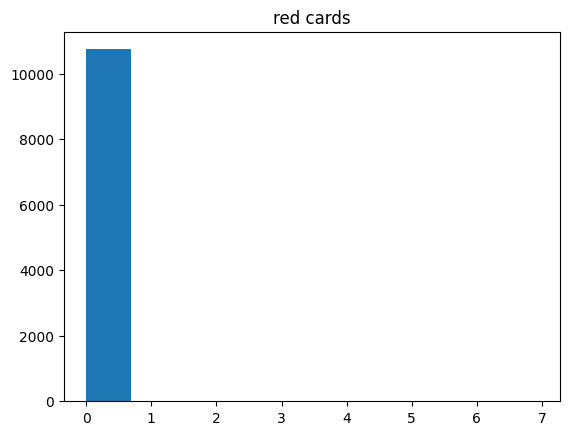

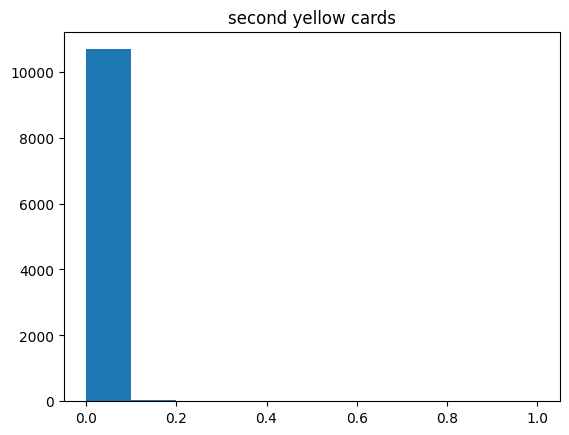

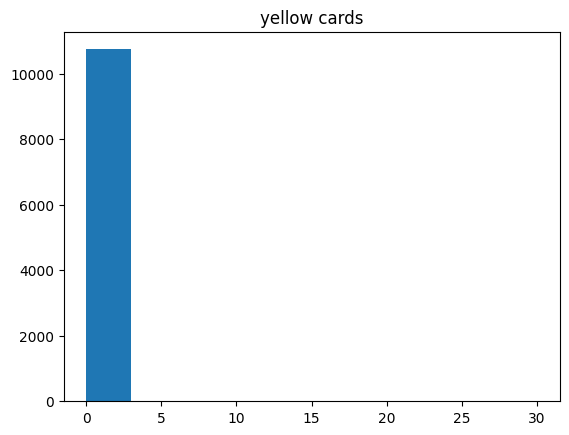

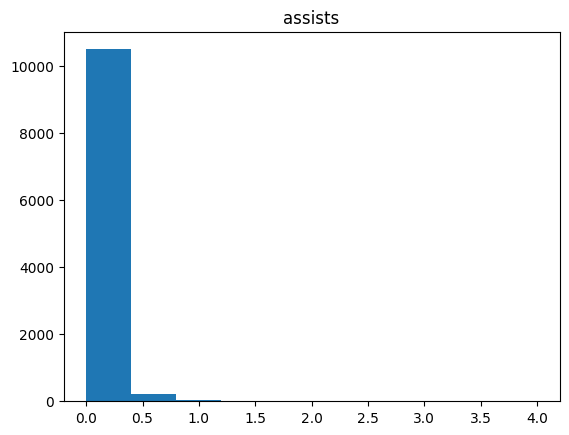

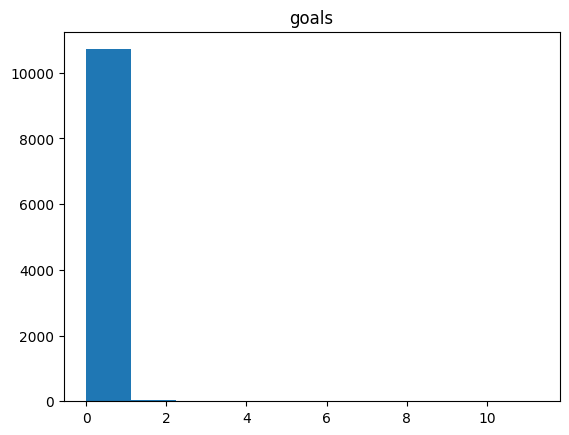

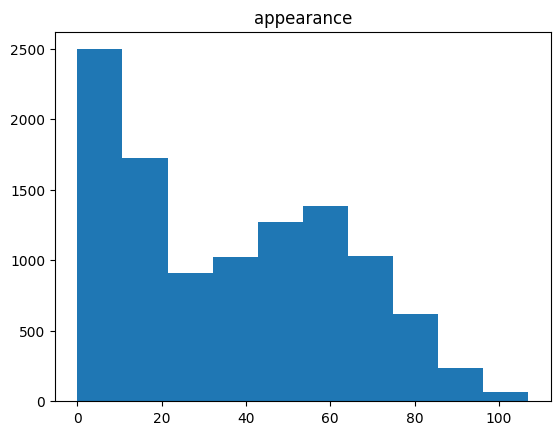

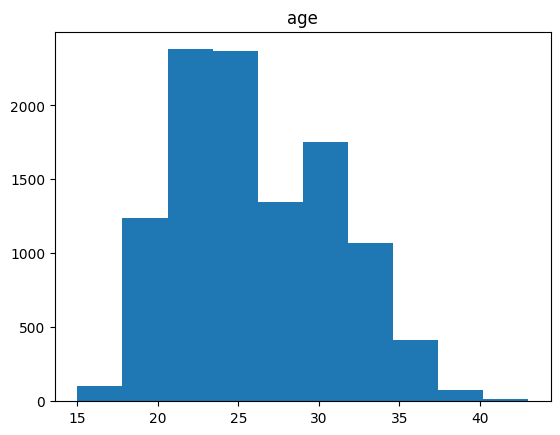

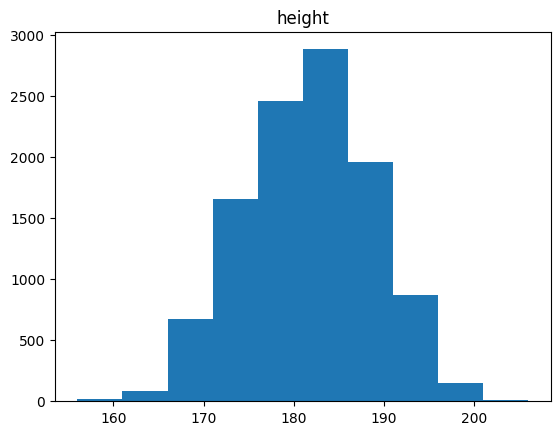

In [47]:
for i in numeric_features: # visual the chart to see the outliers easier
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [48]:
#fillter the dataframe : UnWanted outliers

df = df[(df['appearance'] > 0 ) & (df['appearance'] <= 100)]
df = df[(df['current_value'] >= 200000) & (df['current_value'] <= 40000000)]

df = df[(df['height'] >= 160) & (df['height'] < 204)]
df = df[(df['age'] >= 15) & (df['age'] <= 41)]

df = df[df['yellow cards'] <= 0.7]
df = df[df['goals'] <= 0.5]

df = df[df['assists'] <= 0.36]
df = df[df['second yellow cards'] <= 0.33]

df = df[df['red cards'] <= 0.3]
df = df[df['goals conceded'] <= 1.6]

df = df[df['clean sheets'] <= 0.45]
df = df[(df['minutes played'] > 5) & (df['minutes played'] <= 8550)]

df = df[df['days_injured'] <= 500]
df = df[df['games_injured'] <= 50]

df = df[df['award'] <= 6]
df = df[df['highest_value'] <= 40000000]


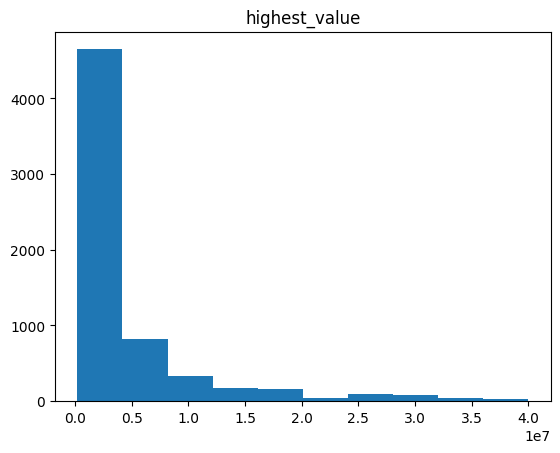

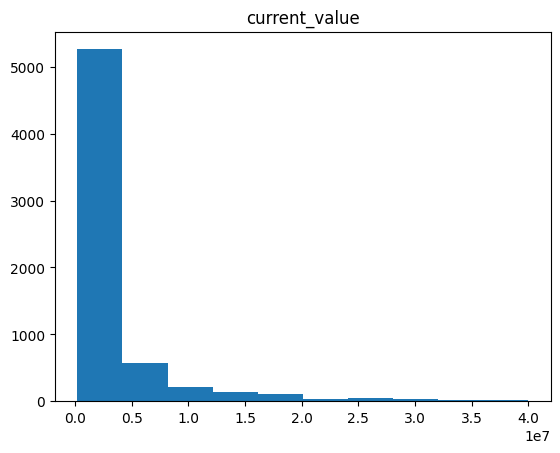

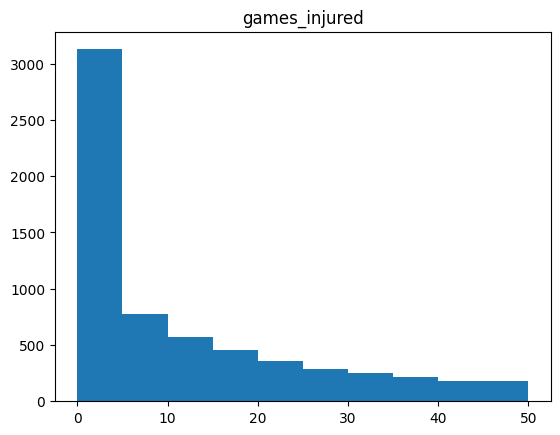

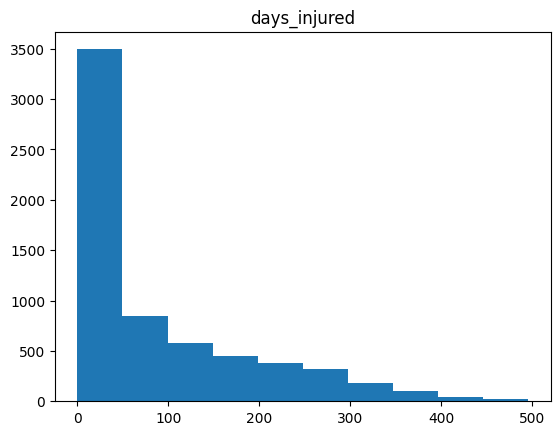

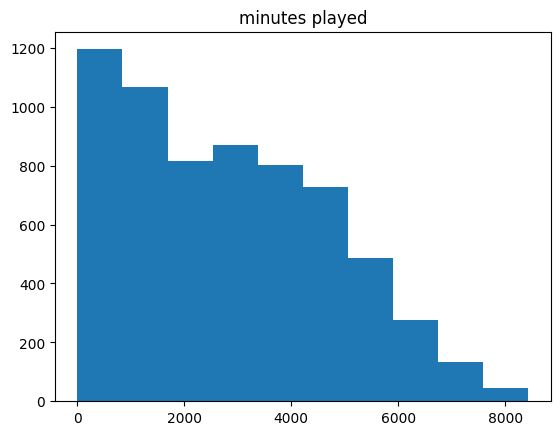

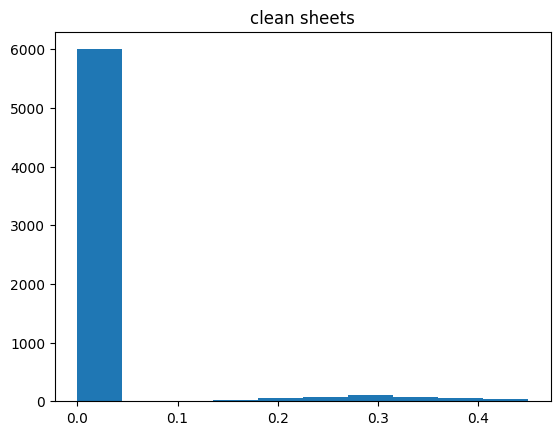

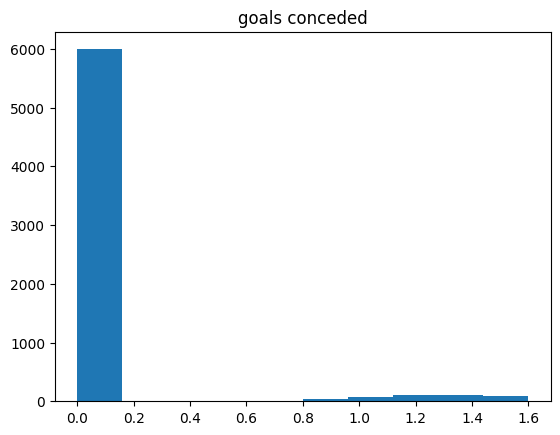

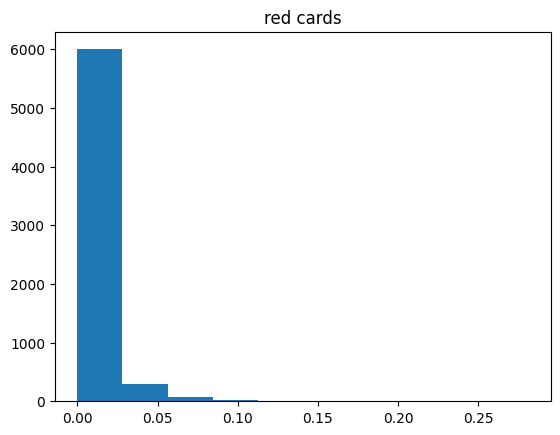

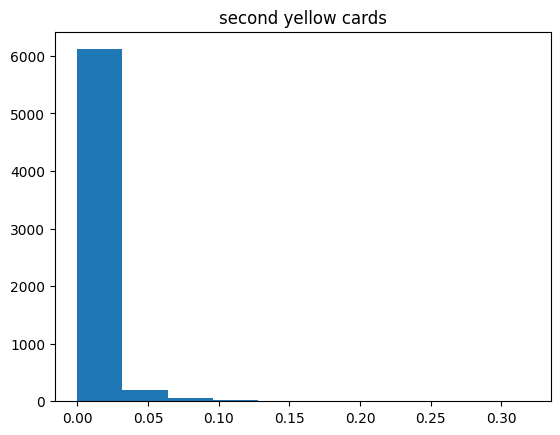

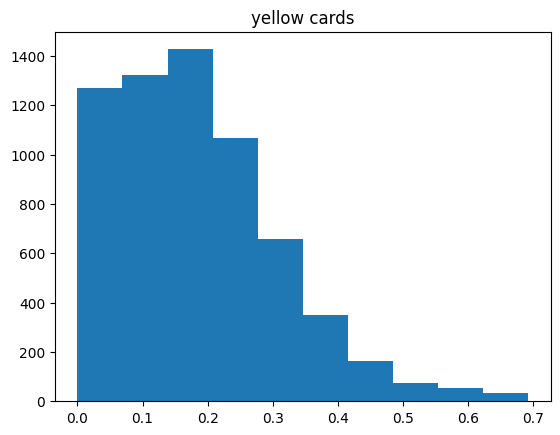

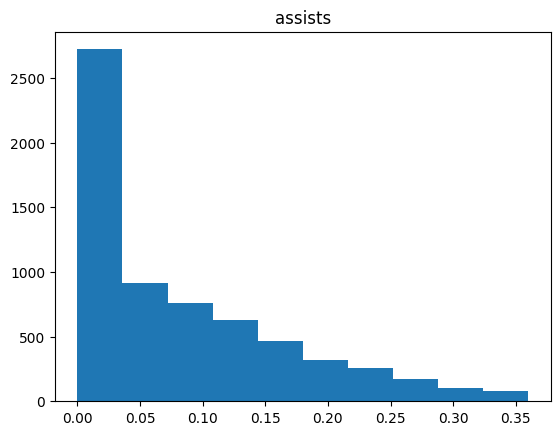

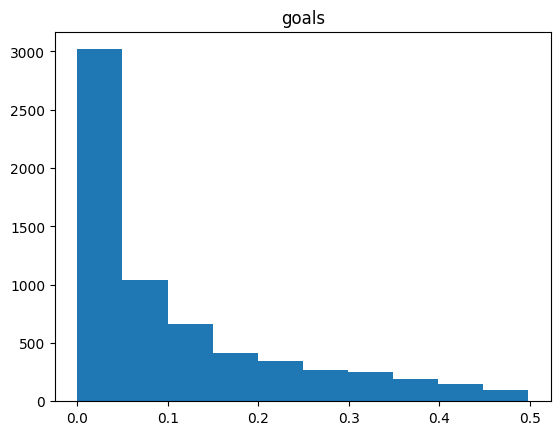

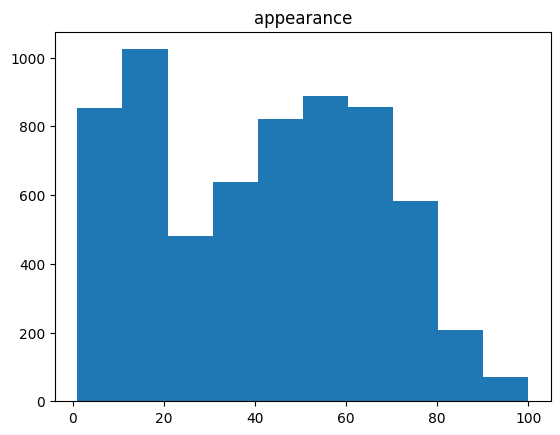

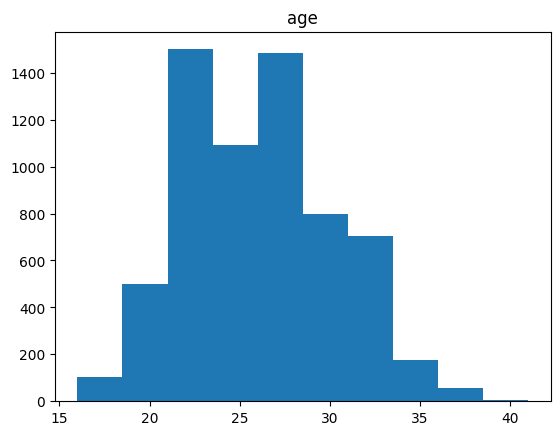

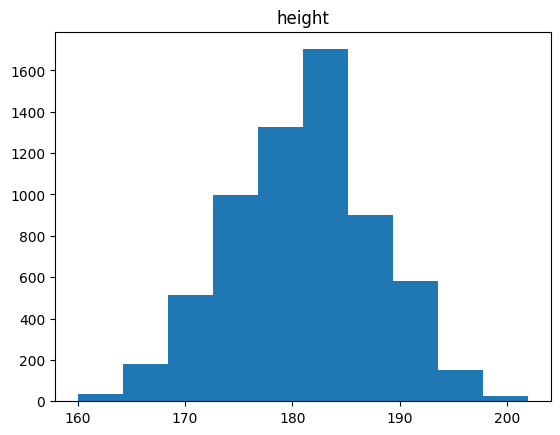

In [49]:
for i in numeric_features: # see it again 
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [50]:
categorical_features

['team', 'position']

In [51]:
df.shape

(6417, 18)

In [52]:
for i in categorical_features: # if theres only 1 observation filter it : dont use 1 it will give  you Error 
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Portimonense SC      26
Watford FC           26
Blackpool FC         26
                     ..
FC Barcelona          2
Bayern Munich         2
Manchester City       2
Gaziantep FK          2
Real Madrid           1
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       768
Attack Centre-Forward          668
midfield-DefensiveMidfield     618
Defender Right-Back            586
Defender Left-Back             567
Attack-RightWinger             475
midfield-AttackingMidfield     468
Attack-LeftWinger              427
Goalkeeper                     424
midfield-LeftMidfield           65
midfield-RightMidfield          62
Attack-SecondStriker            37
midfield                         3
Defender                         1
Attack                           1
Name: count, dtype: int64


In [53]:
# Filter the DataFrame to include only teams that appear at least 2 times
type_counts = df['team'].value_counts()
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [54]:
# Filter the DataFrame to include only teams that appear at least 2 times
type_counts = df['position'].value_counts()
df = df[df['position'].isin(type_counts[type_counts >= 2].index)]


In [55]:
# check it again
for i in categorical_features:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Blackpool FC         26
Portimonense SC      26
Watford FC           26
                     ..
Arsenal FC            4
Bayern Munich         2
Manchester City       2
Gaziantep FK          2
FC Barcelona          2
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       768
Attack Centre-Forward          667
midfield-DefensiveMidfield     618
Defender Right-Back            586
Defender Left-Back             567
Attack-RightWinger             475
midfield-AttackingMidfield     468
Attack-LeftWinger              427
Goalkeeper                     424
midfield-LeftMidfield           65
midfield-RightMidfield          62
Attack-SecondStriker            37
midfield                         3
Name: count, dtype: int64


In [56]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [57]:
df.shape # see the shape of dataframe 

(6414, 403)

#### 3. Feature selection

In [58]:
# Calculate the correlation matrix for the DataFrame
correlation = df.corr()


In [59]:
# Print the correlations between 'current_value' and other columns, sorted in descending order

print(correlation['current_value'].sort_values(ascending=False))

current_value           1.000000
highest_value           0.865505
appearance              0.408634
minutes played          0.408277
team_Aston Villa        0.161312
                          ...   
team_Orlando Pirates   -0.029486
team_Gwangju FC        -0.029841
position_Goalkeeper    -0.031076
goals conceded         -0.032051
age                    -0.131047
Name: current_value, Length: 403, dtype: float64


In [60]:
# Set the correlation threshold
threshold = 0.2 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [61]:
selected_features = ['appearance', 'minutes played','current_value','highest_value']

In [62]:
df = df[selected_features]
df.head()

,appearance,minutes played,current_value,highest_value
8,34,2758,2000000,2000000
10,89,7132,22000000,22000000
11,34,2686,10000000,12000000
12,72,5574,35000000,35000000
13,60,4783,22000000,40000000


#### 4. Prepare train and test data

In [63]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X.shape

(6414, 3)

## Buliding the Model

In [65]:
model = LinearRegression()  # Create a LinearRegression model object


In [66]:
ridge_model = Ridge()  # You can adjust alpha to see different resu


In [67]:
lasso_model = Lasso()  # You can adjust alpha to see different results


In [68]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [69]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [71]:
lasso_model.fit(X_train_scaled, y_train)


Lasso()

In [72]:
grid_search_ridge.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
grid_search_lasso.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

## Test the Model

In [74]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [75]:
y_pred_ridge = ridge_model.predict(X_test_scaled)


In [76]:
y_pred_lasso = lasso_model.predict(X_test_scaled)


In [77]:
# Best hyperparameter
print("Best parameters found: ", grid_search_ridge.best_params_)

# Best model
best_ridge = grid_search_ridge.best_estimator_

Best parameters found:  {'alpha': 5}


In [78]:
# Best hyperparameter
print("Best parameters found: ", grid_search_lasso.best_params_)

# Best model
best_lasso = grid_search_lasso.best_estimator_

Best parameters found:  {'alpha': 5}


In [79]:
y_pred_ridge_cv = best_ridge.predict(X_test_scaled)


In [80]:
y_pred_lasso_cv = best_lasso.predict(X_test_scaled)


## Interpretation of the Model

In [81]:
# Access the coefficient values of the LinearRegression model
model.coef_

array([-483556.31073336,  887001.38339434, 4336320.5653325 ])

In [82]:
# Create a DataFrame containing the model coefficients
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-4.835563e+05
minutes played,8.870014e+05
highest_value,4.336321e+06


In [83]:
print(model.intercept_) 

3003966.0884817773


In [84]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-4.835399e+05
minutes played,8.869856e+05
highest_value,4.336319e+06


In [85]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-4.810733e+05
minutes played,8.849057e+05
highest_value,4.335262e+06


## Evaluating the Model 

1. Mean Square Error

In [86]:
y_base = [y_train.mean()] * len(y_test) # Create a baseline prediction using the mean of the training target variable


In [87]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 33210405324884.363


In [88]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 6759274581504.073
Mean Squared Error for testing: 7222258463594.848


2. Mean Absolute Error

In [89]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 3374435.0700653023


In [90]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1340727.7133751055
Mean Absolute Error for testing: 1386899.707444427


3. Root Mean Squared Error

In [91]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1836.963546199353


In [92]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2599860.4927003435
Root Mean Squared Error for testing: 2687425.992207943


4. R Square

In [93]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7495469698401142
R Square for testing: 0.7818002452826394


#### Predictions vs. Real Values

In [94]:
predictions = model.predict(X_test_scaled)
#predictions

In [95]:
Real_Values = np.array(y_test)
#Real_Values

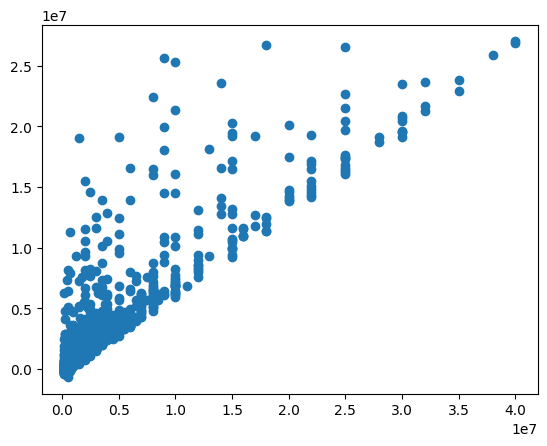

In [96]:
plt.scatter(Real_Values,predictions);  

#### Residual Histogram

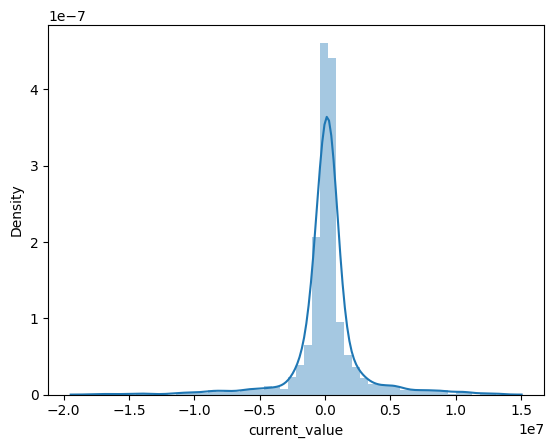

In [97]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

In [98]:
#Thank you 